. Using
(a) the Euler approximation algorithm,
(b) the 1st, 2nd Milstein schemes,
(c) the predictor-corrector method
simulate and plot the trajectory of the
(a) Ornstein-Uhlenbeck process dXt = −θXt + σdWt with X(0) = 10,
θ = 5, and σ = 3.5,
(b) Cox-Ingersoll-Ross process, θ = (2.00, 0.20, 0.15),
(c) Black-Scholes-Merton process, θ = (1.0, 0.2).

(a) the Euler approximation algorithm,
Yi+1 = Yi + b(ti, Yi)(ti+1 − ti) + σ(ti, Yi)(Wi+1 − Wi)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import norm


In [143]:
def O_U(X_O_U, Y_O_U, theta, sigma, dt):
  dW = np.random.normal(0, np.sqrt(dt))
  dX = -theta *  X_O_U * dt + sigma * dW
  dY = -theta *  Y_O_U * dt + sigma * dW
  return dX, dY

In [144]:
theta = 5
sigma = 3.5
N = 10000
X_O_U = np.zeros(N)
Y_O_U = np.zeros(N)
X_O_U[0] = 10
Y_O_U[0] = 10
for i in range(1, N):
    dX, dY = O_U(X_O_U[i - 1], Y_O_U[i - 1], theta, sigma, 1 / N)
    X_O_U[i] = X_O_U[i - 1] + dX
    Y_O_U[i] = Y_O_U[i - 1] + dY

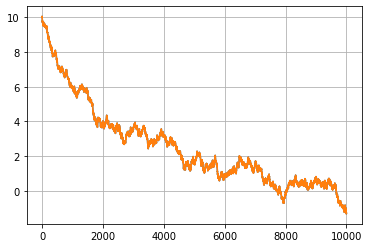

In [145]:
plt.plot(np.linspace(0, N, N), Y_O_U)
plt.plot(np.linspace(0, N, N), X_O_U)
plt.grid()
plt.show()

In [40]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW
    return dX, dY

In [60]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_CIR = np.zeros(N)
Y_CIR = np.zeros(N)
X_CIR[0] = 10
Y_CIR[0] = X_CIR[0]
for i in range(1, N):
    dX, dY = CIR(X_CIR[i - 1], Y_CIR[i - 1], theta1, theta2, theta3, 1 / N)
    X_CIR[i] = X_CIR[i - 1] + dX
    Y_CIR[i] = Y_CIR[i - 1] + dY

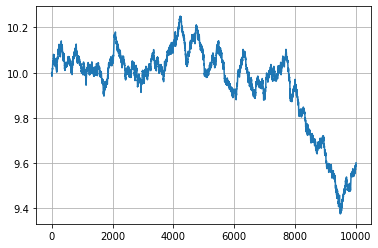

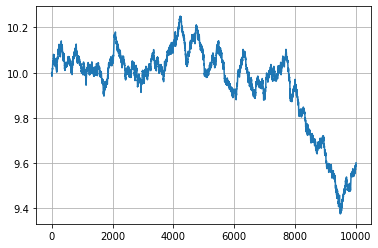

In [61]:
plt.plot(np.linspace(0, N, N), Y_CIR)
#plt.plot(np.linspace(0, N, N), X_cir)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_CIR)
plt.grid()
plt.show()

In [42]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW
    return dX, dY

In [54]:
theta1 = 1
theta2 = 0.2
N = 10000
X_BSM = np.zeros(N)
Y_BSM = np.zeros(N)
X_BSM[0] = 10
Y_BSM[0] = 10
for i in range(1, N):
    dX, dY = BSM(X_BSM[i - 1], Y_BSM[i - 1], theta1, theta2, 1 / N)
    X_BSM[i] = X_BSM[i - 1] + dX
    Y_BSM[i] = Y_BSM[i - 1] + dY

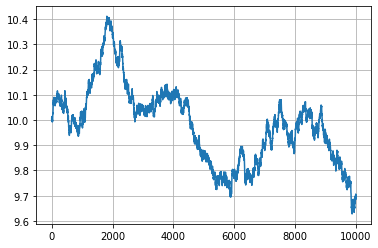

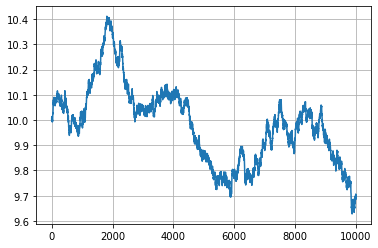

In [51]:
plt.plot(np.linspace(0, N, N), Y_BSM)
#plt.plot(np.linspace(0, N, N), X_cir)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_BSM)
plt.grid()
plt.show()

the 1st Milstein schemes

In [146]:
def O_U(X_O_U, Y_O_U, theta, sigma, dt):
  sigmax = 0
  dW = np.random.normal(0, np.sqrt(dt))
  dX = -theta *  X_O_U * dt + sigma * dW
  dY = -theta *  Y_O_U * dt + sigma * dW + 0.5 * sigma *sigmax *(dW**2 - dt)
  return dX, dY

In [147]:
theta = 5
sigma = 3.5
N = 10000
X_O_U = np.zeros(N)
Y_O_U = np.zeros(N)
X_O_U[0] = 10
Y_O_U[0] = 10
for i in range(1, N):
    dX, dY = O_U(X_O_U[i - 1], Y_O_U[i - 1], theta, sigma, 1 / N)
    X_O_U[i] = X_O_U[i - 1] + dX
    Y_O_U[i] = Y_O_U[i - 1] + dY

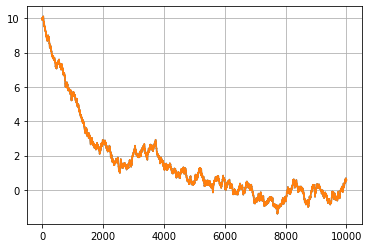

In [148]:
plt.plot(np.linspace(0, N, N), Y_O_U)
plt.plot(np.linspace(0, N, N), X_O_U)
plt.grid()
plt.show()

In [78]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    sigmax = 0
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW + 0.5 * sigma *sigmax *(dW**2 - dt)
    return dX, dY

In [79]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_CIR = np.zeros(N)
Y_CIR = np.zeros(N)
X_CIR[0] = 10
Y_CIR[0] = X_CIR[0]
for i in range(1, N):
    dX, dY = CIR(X_CIR[i - 1], Y_CIR[i - 1], theta1, theta2, theta3, 1 / N)
    X_CIR[i] = X_CIR[i - 1] + dX
    Y_CIR[i] = Y_CIR[i - 1] + dY

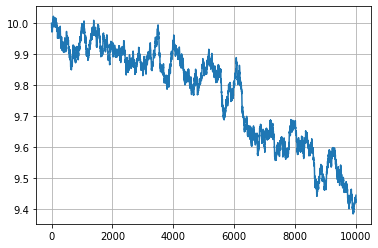

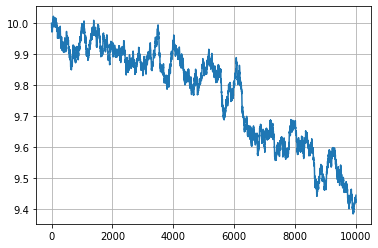

In [81]:
plt.plot(np.linspace(0, N, N), Y_CIR)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_CIR)
plt.grid()
plt.show()

In [82]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    sigmax = Y
    sigma = theta2
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW + 0.5 * sigma *sigmax *(dW**2 - dt)
    return dX, dY

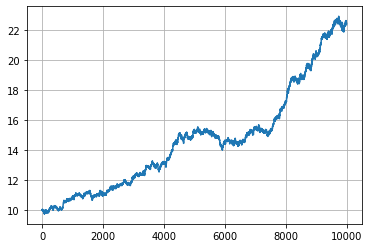

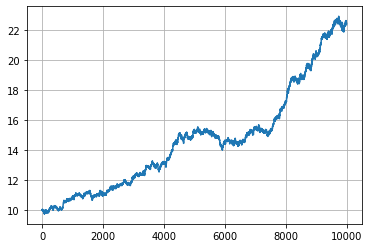

In [83]:
plt.plot(np.linspace(0, N, N), Y_BSM)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_BSM)
plt.grid()
plt.show()

In [ ]:
2nd Milstein schemes

In [163]:
def m_s2(Y, b, sigma, b_x, sigma_x, b_xx, sigma_xx, dW, dt):
    dY = ((b - 0.5 * sigma * sigma_x) * dt + sigma * dW + 0.5 * sigma * sigma_x * (dW ** 2) 
            + (dt ** 1.5) * (0.5 * b * sigma_x + 0.5 * b_x * sigma + 0.25 * sigma ** 2 * sigma_xx) * (dW / np.sqrt(dt))
            + (dt ** 2) * (0.5 * b * b_x + 0.25 * b_xx * (sigma ** 2)))
    return dY

In [164]:
def OU(X, theta1, theta2, dW, dt):
    dX = -theta1 * X * dt + theta2 * dW
    return dX

In [167]:
theta1 = 5
theta2 = 3.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = m_s2(Y_ou[i - 1], -theta1 * Y_ou[i - 1], theta2, -theta1, 0, 0, 0, dW[i],1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

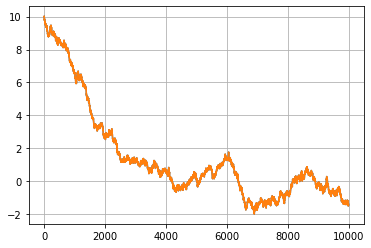

In [168]:
plt.plot(np.linspace(0, N, N), Y_ou)
plt.plot(np.linspace(0, N, N), X_ou)
plt.grid()
plt.show()

In [169]:
def CIR(X, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    return dX

In [171]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = m_s2(Y_cir[i - 1], theta1 - theta2 * Y_cir[i - 1], theta3 * np.sqrt(Y_cir[i - 1]),
                                 -theta2, theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), 0, -0.25 * theta3 / (Y_cir[i - 1] ** 1.5), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

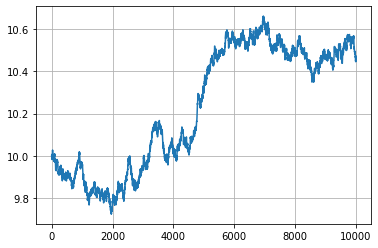

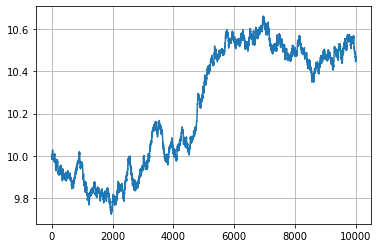

In [173]:
plt.plot(np.linspace(0, N, N), X_cir)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), Y_cir)
plt.grid()
plt.show()

In [116]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    sigmax = Y
    sigma = theta2
    dX = theta1 * X * dt + theta2 * X * dW
    #dY = theta1 * Y * dt + theta2 * Y * dW + 0.5 * sigma *sigmax *(dW**2 - dt)
    return  dY

In [118]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = m_s2(Y_bsm[i - 1], theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta1, theta2, 0, 0, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

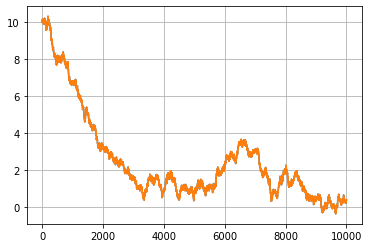

In [176]:
plt.plot(np.linspace(0, N, N), Y_ou)
plt.plot(np.linspace(0, N, N), X_ou)
plt.grid()
plt.show()

In [120]:
def predictor(Y, alpha, etha, b, sigma, sigma_x, dW, dt):
    Y_wave = Y + b * dt + sigma * dW
    b_wave = b - etha * sigma * sigma_x
    dY = (alpha * b_wave + (1 - alpha) * b_wave) * dt + (etha * sigma + (1 - etha) * sigma) * dW
    return dY

In [175]:
theta1 = 5
theta2 = 3.5
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor(Y_ou[i - 1], alpha, etha, -theta1 * Y_ou[i - 1], theta2, 0, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

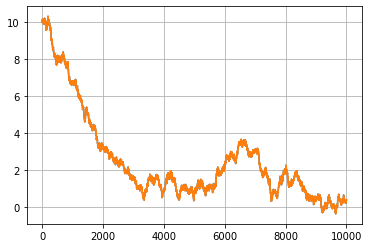

In [177]:
plt.plot(np.linspace(0, N, N), Y_ou)
plt.plot(np.linspace(0, N, N), X_ou)
plt.grid()
plt.show()

In [178]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = predictor(Y_cir[i - 1], alpha, etha, (theta1 - theta2 * Y_cir[i - 1]), theta3 * np.sqrt(Y_cir[i - 1]), 
                            theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

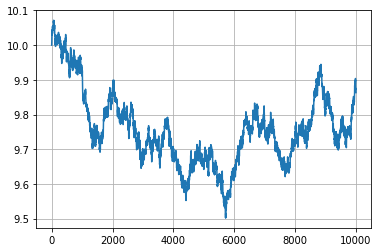

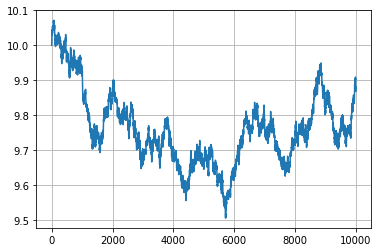

In [179]:
plt.plot(np.linspace(0, N, N), Y_cir)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_cir)
plt.grid()
plt.show()

In [ ]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor(Y_bsm[i - 1], alpha, etha, theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

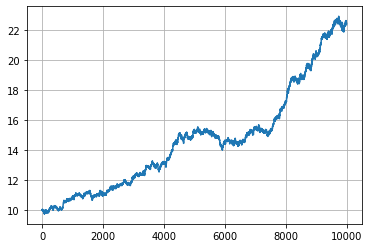

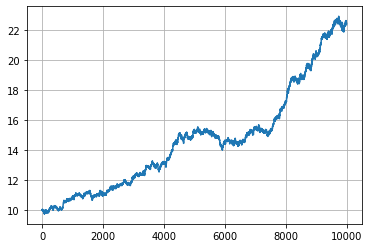

In [130]:
plt.plot(np.linspace(0, N, N), Y_BSM)
plt.grid()
plt.show()

plt.plot(np.linspace(0, N, N), X_BSM)
plt.grid()
plt.show()

In [ ]:
Сравните скорость сходимости схем Эйлера и Мильштейна к истинной
значение как функция шага дискретизации ∆t = 1/N

In [25]:
def BM () :
  W =[]
  T =1
  W += [0]
  Delta = T / N
  X =[ i / N for i in range (N+1)]
  for i in range (1, len(X)) :
    W +=[W[i -1]+ np.random.normal(0, 1, 1) * np.sqrt(Delta) ]
  return W

In [33]:
def BM(N, T):
    W = np.zeros(N)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N):
        W[i] += W[i-1] + np.random.normal(0, )
    return W

In [19]:
def SBM(mu, sigma, t, W):
    return np.exp((mu - (sigma**2)/2)*t + sigma * W)

In [20]:
def GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW
    return dS

In [21]:
def M_GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW + (sigma**2) * S * ((dW**2) - dt) / 2
    return dS

In [22]:
N = 1000
T = 1
t = np.linspace(0, T, N)
dt = np.linspace(0, T, N)
mu = 1
sigma = 0.2
alpha = 0.33
eta   = 0.25

In [23]:
S_SBM = np.zeros(N)
SE_gbm = np.zeros(N)
SM_gbm = np.zeros(N)
errorE = np.zeros(N)
errorM = np.zeros(N)
S_SBM[0] = 10
SE_gbm[0] = 10
SM_gbm[0] = 10

In [35]:
W  = BM (T, N)
dW = 0

In [36]:
for i in range(1, N):
    dW = W[i] - W[i-1]
    S_SBM[i]   = S_SBM[0] * SBM(mu, sigma, t[i], W[i-1])
    SE_gbm[i] = SE_gbm[i-1] + GBM(SE_gbm[i-1], 1, 0.2, dt, dW)
    SM_gbm[i]  = SM_gbm[i-1] + M_GBM(SM_gbm[i-1], 1, 0.2, dt, dW)   
    errorE[i] = abs(S_SBM[i] - SE_gbm[i])
    errorM[i]  = abs(S_SBM[i] - SM_gbm[i])

plt.plot (t, S_SBM, linewidth =1.0, label="Стандартное броуновское движение")
plt.plot (t, SE_gbm, linewidth =1.0, label="Эйлер")
plt.plot (t, SM_gbm, linewidth =1.0, label="Мильштейн")

plt.title ("Схема Эйлера и Мильштейна для Броуновского движения")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.grid ()
plt.xlim(1*T/100, T)
plt.show ()

IndexError: ignored